In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
from simulator import compute_liouvillian, get_spectral_components, calculate_spectrum

interactive(children=(FloatSlider(value=0.1, description='pb', max=1.0, step=0.01), FloatSlider(value=100.0, d…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
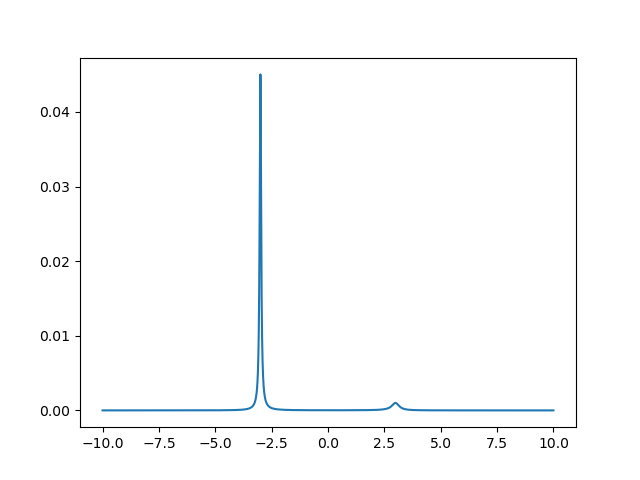

In [3]:
nu0 = -80.0
spectral_width = 20.0

# set up plot
fig, ax = plt.subplots()

@widgets.interact(kex=(0.0, 1e4, 10.0), pb=(0.0, 1.0, .01), wa=(-10.0, 10.0, 0.1), wb=(-10.0, 10.0, 0.1), r2a=(0.0, 100.0, 0.1), r2b=(0.0, 100.0, 0.1))
def update(pb=0.1, kex=100.0, wa=-3.0, wb=3.0, r2a=10.0, r2b=10.0):
    L = compute_liouvillian(nu0, pb, kex, wa, wb, r2a, r2b)
    spectral_components = get_spectral_components(L, pb)
    x, y = calculate_spectrum(spectral_width, nu0, spectral_components)

    """Remove old line from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, y, color='C0')
